#Pandas Express 
###An express guide to becoming a Kung Fu Pandas master

<img src="http://vignette1.wikia.nocookie.net/kungfupanda/images/8/88/Po2.jpg/revision/latest?cb=20100726062228" width="300"/>

After defeating the evil snow leopard Tai Lung, our favorite kung fu panda master Po returns to the Valley of Peace to help his goose father Mr. Ping with his noodle restaurant. Mr. Ping's noodle restaurant is sadly in a slump and 

###The Tools
This tutorial will walk you through doing some basic data cleaning and exploratory analysis with Pandas and a suite of other Python data analysis tools. Below are a few of the tools we will be using:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), for making plots pretty

In [112]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# iPython command to format matplotlib plots
%matplotlib inline 

If you have trouble importing any of the packages, you might need to install it first from the website or, if you're on Mac OS or ubuntu, from the console with: `pip install <name of package>`

###The Dataset
We will be using a dataset of Yelp reviews provided by the [Yelp Dataset Challenge](http://www.yelp.com/dataset_challenge). The download consists of the following files in JSON format:
* business.json - information on businesses
* review.json - text and metadata of reviews
* tip.json - text and metadata of tips
* user.json - information on users
* checkin.json - number of checkins at each business

In this tutorial, we will be primarily focused on the business.json file

###Loading in and cleaning the data
The Yelp dataset is in JSON format, [which you can read about here](https://en.wikipedia.org/wiki/JSON) if you are at all interested. Luckily, Python (and most other programming languages) have packages for parsing and reading JSON file formats. In this case, we are going to use Python's JSON file reader to read in the file and then convert it to a Pandas DataFrame. 

(Note: Pandas also has a [`read_json`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) function that reads in a JSON file into a DataFrame directly, but in this case, we had to do a little cleanup to remove trailing whitespace at the end of each line, so we didn't use that particular function)

####Load in data

In [113]:
import json

'''
load_data(filepath) 
Given a filepath to a JSON file, loads in the file and formats the JSON
'''
def load_data(filepath):
    data = []
    
    # Open file and read in line by line
    with open(filepath) as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))

    return data

In [114]:
data = load_data('data/business.json')

In [115]:
business_df = pd.DataFrame.from_dict(data)

####Now let's take a peek inside
The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe) has a full list of functions, but below are some helpful ones for doing some initial poking around. 

In [116]:
'''
head(n=5)
Returns first n rows
'''
business_df.head(5)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


In [117]:
'''
info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)
Concise summary of a DataFrame.
'''
business_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 61183
Data columns (total 15 columns):
attributes       61184 non-null object
business_id      61184 non-null object
categories       61184 non-null object
city             61184 non-null object
full_address     61184 non-null object
hours            61184 non-null object
latitude         61184 non-null float64
longitude        61184 non-null float64
name             61184 non-null object
neighborhoods    61184 non-null object
open             61184 non-null bool
review_count     61184 non-null int64
stars            61184 non-null float64
state            61184 non-null object
type             61184 non-null object
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 7.1+ MB


In [118]:
'''
describe(percentile_width=None, percentiles=None, include=None, exclude=None)
Generate various summary statistics, excluding NaN values.
'''
business_df.describe()

,latitude,longitude,open,review_count,stars
count,61184.000000,61184.000000,61184,61184.000000,61184.000000
mean,37.326077,-97.491803,0.878089,28.272506,3.673305
std,5.741085,29.624473,0.3271856,88.652050,0.891207
min,32.871923,-115.386550,False,3.000000,1.000000
25%,33.509601,-115.052224,1,4.000000,3.000000
50%,35.994636,-111.932944,1,8.000000,3.500000
75%,36.240430,-80.863329,1,21.000000,4.500000
max,56.036545,8.549249,True,4578.000000,5.000000


In [119]:
'''
shape
Attribute of a DataFrame as (rows, columns)
'''
business_df.shape

(61184, 15)

Some of the most commonly used operations on Dataframes are various types of indexing, filtering, and slicing. Pandas has a number of different ways to do these operations ([check out this whole page of documentation about it](http://pandas.pydata.org/pandas-docs/stable/indexing.html)), but below are a few examples.

In [11]:
# Select a column (returns a Series)
business_df['name']

0                                    Eric Goldberg, MD
1                                         Clancy's Pub
2                             Cool Springs Golf Center
3                                     Verizon Wireless
4                                        Emil's Lounge
5                                Alexion's Bar & Grill
6                      Flynn's E W Tire Service Center
7                     Forsythe Miniature Golf & Snacks
8                            Quaker State Construction
9                              Kings Family Restaurant
10                                         Shop N'save
11                                      Rocky's Lounge
12                                           Gab & Eat
13                        Barb's Country Junction Cafe
14       Extended Stay America - Pittsburgh - Carnegie
15                                  Paddy's Pour House
16                          Porto Fino Pizzaria & Gyro
17                                    Alteration World
18        

In [12]:
# Select multiple columns (returns a DataFrame)
business_df[['business_id', 'name']]

,business_id,name
0,vcNAWiLM4dR7D2nwwJ7nCA,"Eric Goldberg, MD"
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center
3,HZdLhv6COCleJMo7nPl-RA,Verizon Wireless
4,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge
5,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill
6,b12U9TFESStdy7CsTtcOeg,Flynn's E W Tire Service Center
7,Sktj1eHQFuVa-M4bgnEh8g,Forsythe Miniature Golf & Snacks
8,3ZVKmuK2l7uXPE6lXY4Dbg,Quaker State Construction
9,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant


In [120]:
# Filter a column on a value
business_df[business_df['name'] == 'Panda Express']

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
1816,"{u'Take-out': True, u'Accepts Credit Cards': T...",kMcbuXZx3iILJVEPyLgPpQ,"[Chinese, Restaurants]",Champaign,"2000 N Neil St\nChampaign, IL 61820",{},40.139918,-88.244639,Panda Express,[],True,5,3.5,IL,business
2613,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",nLpV9fo8xml-QHOKyOje2A,"[Chinese, Restaurants]",Phoenix,"3923 E Thomas Rd\nPhoenix, AZ 85018",{},33.479870,-111.997824,Panda Express,[],True,13,2.5,AZ,business
2778,"{u'Take-out': True, u'Accepts Credit Cards': T...",wLZ--5d4lXImxrG7VhdTyA,"[Chinese, Restaurants]",Phoenix,"7000 N 16th St\nSte 100\nPhoenix, AZ 85020",{},33.538927,-112.048079,Panda Express,[],True,11,3.5,AZ,business
2994,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",VTFx4ADDP6nPnlcMHB1-Ow,"[Chinese, Restaurants]",Phoenix,"903 E Bell Rd\nSte 101\nPhoenix, AZ 85022",{},33.640255,-112.061145,Panda Express,[],True,7,4.0,AZ,business
3053,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",bexPpkHMthuCaeC0g0Lrfg,"[Chinese, Restaurants]",Phoenix,"10637 N Tatum Blvd\nPhoenix, AZ 85028","{u'Monday': {u'close': u'21:00', u'open': u'10...",33.584266,-111.976787,Panda Express,[],True,7,3.0,AZ,business
3282,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",rEC1QrZVEYH8LpowJ_DNZA,[Restaurants],Phoenix,"3932 E Thunderbird Rd\nSuite 111\nPhoenix, AZ ...",{},33.611868,-111.996439,Panda Express,[],True,6,4.0,AZ,business
3770,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",4DDbIvNtzfhLRwz-EOLFDA,"[Food, Desserts, Asian Fusion, Chinese, Restau...",Phoenix,"21001 N Tatum Blvd\nSte 1630\nPhoenix, AZ 85050","{u'Monday': {u'close': u'22:30', u'open': u'10...",33.678615,-111.974607,Panda Express,[],True,8,4.0,AZ,business
4033,"{u'Take-out': True, u'Accepts Credit Cards': T...",LjwXnAjusrwCZGsWV3Ue8Q,[Restaurants],Mesa,"3440 E Baseline Road\nMesa, AZ 85204",{},33.379624,-111.755988,Panda Express,[],True,10,2.5,AZ,business
4156,"{u'Take-out': True, u'Takes Reservations': Fal...",iyDeQ21CQO2-eKbbiHzrWg,"[Chinese, Restaurants]",Mesa,"1959 S Power Rd\nMesa, AZ 85206",{},33.380304,-111.688796,Panda Express,[],True,3,2.0,AZ,business
4720,"{u'Take-out': True, u'Good For': {u'dessert': ...",9whGt6zd2ulTYKqRNB02yA,[Restaurants],Chandler,"3111 W Chandler Boulevard\nChandler, AZ 85226",{},33.305681,-111.897553,Panda Express,[],True,3,2.5,AZ,business


###Cleaning and formatting columns

Taking a closer look at the some of the columns, we see that they're not all very user-friendly, so we need to do a little bit of additional cleanup. 

####Format attributes column
Taking a closer look at the `attributes` column, we see that all the attributes for a business are still stored in mulitple levels of nested JSON (which is really annoying to deal with in a DataFrame because you can't sort and do various operations with it). Luckily, the `pandas.io.json` library came equipped with a nifty little function called [`json_normalize`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html) which takes a JSON object, "flattens" any nested objects, and returns a Pandas DataFrame. So we will use this function to create a `attributes_df` DataFrame to store the attributes of a business.

In [122]:
# Collect the business_id and attributes columns and format as a list of dict objects
collect = [{'business_id': x[0], 'attributes': x[1]} for x in business_df[['business_id', 'attributes']].values]

In [123]:
# Create a DataFrame with json_normalize
attributes_df = pd.io.json.json_normalize(collect)

In [131]:
# Save the list of attributes for future use
attributes = attributes_df.drop('business_id', axis=1).columns.values

We could do something similar for the `hours` column since it is also stored in this format, but we're not going to use that for now. 

We're  also going to just keep `attributes_df` separate for now instead of merging it into our original `business_df`

####Create dummy/indicator variables for categories column

If we now look at the `categories` column, we see that the categories are stored as lists. While that's easy to read, it's not actually in the most usable format if we're going to conduct any data analysis (for example, if we wanted to know how many Chinese restaurants we had in our dataset). So we are going to use a Pandas function called [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to create dummy variables for each of the categories.

In [144]:
# Create dummy variables for categories
categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')

In [145]:
# Save the list of categories for future use
categories = categories_df.columns.values

In [146]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

Now we can do things like, say, filter `business_df` for all Chinese restaurants, or do a count of the number of Chinese restaurants

In [147]:
business_df[business_df['Chinese'] == 1]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
20,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],...,0,0,0,0,0,0,0,0,0,0
44,"{u'Take-out': True, u'Accepts Credit Cards': T...",TfvWSIAMFZ9zI3y2-K6wOA,"[Food, Food Delivery Services, Chinese, Restau...",Munhall,"3360 Main St\nMunhall, PA 15120","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.386776,-79.902819,The Dragon Chinese Cuisine,[],...,0,0,0,0,0,0,0,0,0,0
48,"{u'Take-out': True, u'Accepts Credit Cards': T...",JDDeaNfb0JXD1NbznSIC9g,"[Gluten-Free, Asian Fusion, Chinese, Restaurants]",Homestead,The Waterfront\n148 W Bridge St\nHomestead\nHo...,"{u'Monday': {u'close': u'22:00', u'open': u'11...",40.407111,-79.916150,P F Chang's China Bistro,[Homestead],...,0,0,0,0,0,0,0,0,0,0
68,"{u'Take-out': True, u'Accepts Credit Cards': F...",iBZRphMDFcS2aMbawc1OvA,"[Chinese, Restaurants]",West Mifflin,"1822 Homeville Rd\nWest Mifflin, PA 15122",{},40.373677,-79.873734,Hunan Wok Chinese Restaurant,[],...,0,0,0,0,0,0,0,0,0,0
79,"{u'Take-out': True, u'Accepts Credit Cards': T...",Lml0-yTNsMYsP9IrSMxw9A,"[Chinese, Restaurants]",Bellevue,"610 Lincoln Ave\nBellevue\nBellevue, PA 15202",{},40.497070,-80.058601,China Sea Chinese Restaurant,[Bellevue],...,0,0,0,0,0,0,0,0,0,0
99,"{u'Take-out': True, u'Accepts Credit Cards': T...",Y2p07YEC8xOsYTHWf0UxiA,"[Chinese, Restaurants]",Pittsburgh,"213 S Highland Ave\nShadyside\nPittsburgh, PA ...","{u'Monday': {u'close': u'21:30', u'open': u'17...",40.458251,-79.925117,Tasty Chinese Restaurant,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
111,"{u'Take-out': True, u'Accepts Credit Cards': T...",UtWJ8NGMg-3z28s0RzlUoQ,"[Chinese, Restaurants]",Pittsburgh,"6393 Penn Ave\nShadyside\nPittsburgh, PA 15206",{},40.457926,-79.918032,China Garden,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
134,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",tvXTHj9V5sgRoeVJW_FiTg,"[Chinese, Restaurants]",Pittsburgh,"5700 Centre Ave\nShadyside\nPittsburgh, PA 15206",{},40.457261,-79.933663,Jimmy Tsang's Chinese Restaurant,[Shadyside],...,0,0,0,0,0,0,0,0,0,0
152,"{u'Delivery': True, u'Noise Level': u'average'...",W7-Ybhe6JWJFXjcbmgvdyA,"[Chinese, Restaurants]",Pittsburgh,"243 Brownsville Rd\nMt. Oliver\nPittsburgh, PA...","{u'Monday': {u'close': u'22:30', u'open': u'11...",40.414706,-79.987769,Great Wall Chinese Food,[Mt. Oliver],...,0,0,0,0,0,0,0,0,0,0
154,"{u'Take-out': True, u'Accepts Credit Cards': T...",YXuvFMtygHPFEOEXgRtgLQ,"[Chinese, Restaurants]",Pittsburgh,"823 E Warrington Ave\nAllentown\nPittsburgh, P...",{},40.421892,-79.992815,No 1 China House,[Allentown],...,0,0,0,0,0,0,0,0,0,0


In [17]:
business_df['Chinese'].sum()

1496

In [19]:
# Print out the top 10 categories
business_df[categories].sum().order(ascending=False)[:10]

Restaurants         21892
Shopping             8919
Food                 7862
Beauty & Spas        4738
Nightlife            4340
Bars                 3628
Health & Medical     3213
Automotive           2965
Home Services        2853
Fashion              2566
dtype: int64

###Exploratory Analysis
So now we have a fairly nicely formatted dataset - we should be in business to do some analysis! First, we might be interested in some basic descriptive statistics about our dataset and plotting out insights. Python has a number of visualization libraries, some built on top of others. We will primarily be using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), which is a library based on [matplotlib](http://matplotlib.org/), but feel free to check out some of the other options as well!

####Top rated Chinese restaurants


In [20]:
business_df[business_df['Chinese'] == 1][['name','stars']].sort(columns='stars', ascending=False)[:10]

,name,stars
46961,MB China,5
3899,China Express,5
60502,Chun Fai Chinese Eatery,5
51506,B&D's Kitchen,5
56390,Yangda,5
60604,Chef Ming's Chinese Cuisine,5
55230,Winter In July - A Pop-Up Lunch with Yonaka an...,5
58370,Restaurant Yi Pin Xiang,5
56312,Oasis Asian Kitchen,5
31169,Bai Ling Chinese Restaurant,5


In [21]:
business_df[business_df['Chinese'] == 1][categories].sum().order(ascending=False)[:20]

Restaurants       1496
Chinese           1496
Asian Fusion       128
Buffets            106
Thai                61
Fast Food           59
Dim Sum             49
Japanese            48
Sushi Bars          41
Gluten-Free         32
Food                30
Vietnamese          27
Szechuan            26
Taiwanese           22
Seafood             21
Cantonese           18
Nightlife           16
Bars                15
Korean               9
Specialty Food       9
dtype: int64

####Ratings Distribution

In [22]:
print "Mean: %f" % business_df['stars'].mean()
print "Min: %f" % business_df['stars'].min()
print "Max: %f" % business_df['stars'].max()

Mean: 3.673305
Min: 1.000000
Max: 5.000000


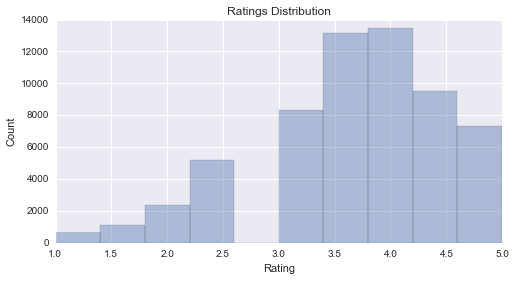

In [23]:
sns.set(rc={"figure.figsize": (8, 4)})

sns.distplot(business_df['stars'], kde=False, bins=10)

plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

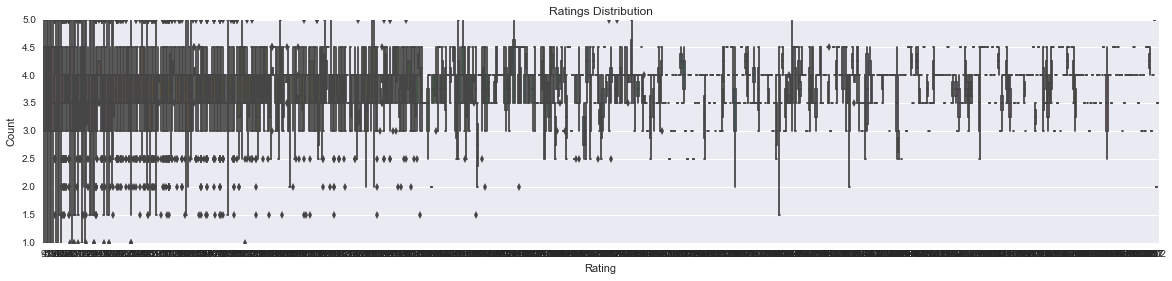

In [24]:
sns.set(rc={"figure.figsize": (20, 4)})

sns.boxplot(data=business_df, x='review_count', y='stars', orient='v')

plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [25]:
df = business_df.drop(['name', 'business_id', 'categories', 'full_address', 'city', 'neighborhoods', 'state', 'type', 'latitude', 'longitude'], axis=1)

In [44]:
import patsy
all_columns = "+".join(df.columns.difference(['stars']))
labels, values = patsy.dmatrices('stars ~ ' + str(all_columns), df)
# labels, matrix = patsy.dmatrices((df['stars'], df.drop('stars', axis=1)), df, return_type='dataframe')

NameError: name 'Pay' is not defined

In [84]:
df = business_df.convert_objects(convert_numeric=True)

In [85]:
df = df.select_dtypes(exclude=['object'])

In [91]:
from sklearn.cross_validation import train_test_split

# split into test and train sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df.drop('stars', axis=1).values, pd.get_dummies(df['stars'].values), test_size=0.3, random_state=42)

In [92]:
import statsmodels as sm

model = sm.discrete.discrete_model.MNLogit(train_labels, train_data)
results = model.fit_regularized()
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [68]:
train_data[0]

array([True, nan, nan, u'full_bar', False, False, False, False, False,
       False, False, False, False, u'casual', nan, nan, nan, True, False,
       nan, False, nan, nan, nan, nan, nan, nan, nan, False, nan, nan,
       True, nan, False, False, False, False, False, False, False, nan,
       nan, nan, nan, nan, nan, nan, nan, False, True, nan, True, False,
       nan, True, nan, False, u'loud', nan, nan, False, True, False, True,
       True, False, nan, nan, nan, nan, nan, 2.0, u'outdoor', False, nan,
       True, True, u'paid', u'17:00', u'09:00', u'17:00', u'09:00', nan,
       nan, nan, nan, u'17:00', u'09:00', u'17:00', u'09:00', u'17:00',
       u'09:00', True, 42], dtype=object)

In [69]:
for col in df[col].dtype == 
df.drop(col, axis=1)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [63]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators = 100, max_features='auto', max_depth=4)
clf = clf.fit(train_data,train_labels)
predictions = clf.predict(test_data)
score = forest.score(test_data, test_labels)
print "Score: %s" % (score)
    
# # print the confusion matrix
# print "Confusion Matrix:"
# cm = confusion_matrix(test_data[0::,0], predictions)
# print cm
# print "Normalized Confusion Matrix:"
# normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print normalized

# # look at feature importance
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # print the feature ranking
# print("Feature ranking:")
# sorted_features = []
# for f in range(len(indices)):
#     print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))
#     sorted_features.append(features[indices[f]])

# # plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(len(indices)), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(len(indices)), sorted_features, rotation=70)
# plt.xlim([-1, len(indices)])
# plt.show()

ValueError: could not convert string to float: beer_and_wine